<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Tarea%206/Parte%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
from collections import Counter
from scipy.stats import gamma, norm, uniform
import sympy as sp
import math
import random

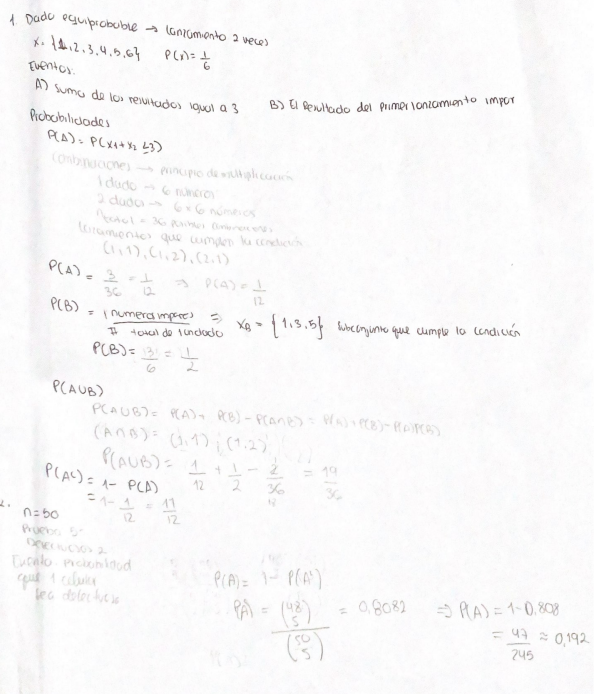

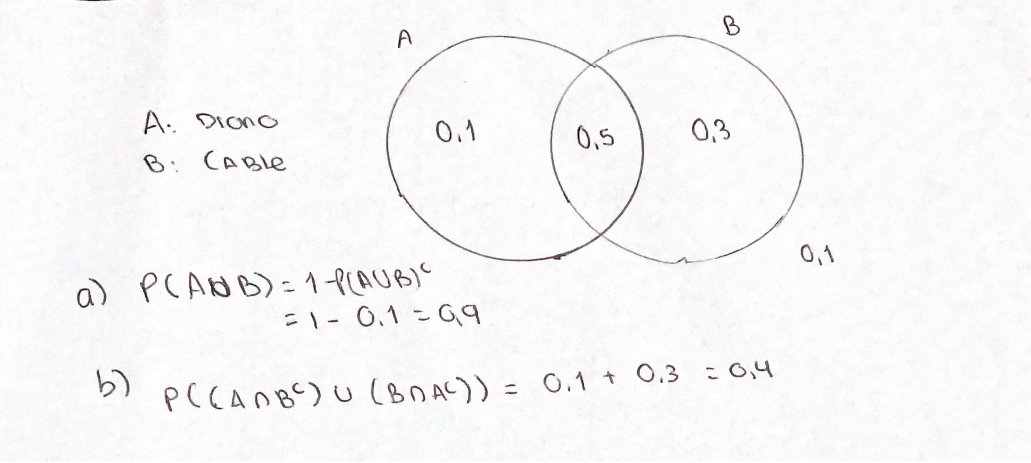

Cumpleaños

In [162]:
def GetProbB(n):
    if n <= 365:
        prob = 1.0
        for i in range(1,n):
            prob *= (365 - i)/365
        return prob
    else:
        return 0

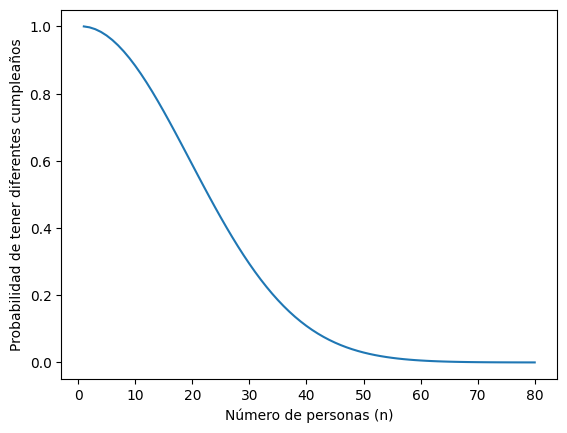

In [163]:
ni = np.arange(1, 81)
probabilidades = [GetProbB(n) for n in ni]
plt.plot(ni,probabilidades)
plt.xlabel('Número de personas (n)')
plt.ylabel('Probabilidad de tener diferentes cumpleaños')
plt.show()


Se lanzan dos dados equi-probables y se observan los siguientes eventos:


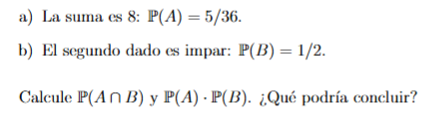

In [164]:
S = 6*6
#a) X1 + x2 = 8
H = [(2,6),(6,2),(3,5),(5,3),(4,4)]
Favorable = len(H)
Pa = Favorable/S
print(Pa)
#b) Dado 2 impar
T = 3*6
Pb = T/S
print(Pb)

0.1388888888888889
0.5


In [165]:
#Probabilidad de que en el lanzamiento la suma sea igual a 8 y el segundo dado sea impar
H =  [(3,5),(5,3)]
P = len(H)/S
print(P)
# Multiplicación de la probabilidad del evento a y b
P = Pa * Pb
print(P)

0.05555555555555555
0.06944444444444445


Dado que P(A∩B) ≠ P(A)*P(B), los eventos no son independientes.

Se lanza simult ́aneamente 3 dados de 6 caras.  ¿Cu ́al es la probabilidad de obtener 1 par?P(A) = 5/12.  Realice el c ́alculo de esta probabilidad usando un experimento virtual conN= 105eventos.

In [166]:
#Dado

def GetProb3Dados(N):
    pares = 0
    for i in range(N):
        dados = [random.randint(1, 6) for i in range(3)]
        dados.sort()
        if dados[0] == dados[1] != dados[2] or dados[1] == dados[2] != dados[0]:
            pares += 1
    return pares / N

In [167]:
probPar = GetProb3Dados(10**5)
print("Probabilidad de obtener un par:", probPar)

Probabilidad de obtener un par: 0.41621


 Se lanza simult ́aneamente 5 dados de 6 caras.  ¿Cu ́al es la probabilidad de obtenter?

In [168]:
from typing import Counter
#1 par y doble par
def GetProb5Dados(N):
    pares = 0
    dpares = 0
    ciguales = 0
    for i in range(N):
        dados = Counter(random.randint(1, 6) for i in range(5)).values()
        pares += sum(j == 2 for j in dados) == 1
        dpares += sum(j == 2 for j in dados) == 2
        ciguales += sum(j == 4 for j in dados) == 1
    return pares / N, dpares / N, ciguales / N

probPar, probDobles, probcuatro = GetProb5Dados(10**5)
print("Probabilidad de obtener un par:", probPar)
print("Probabilidad de obtener un doble par:", probDobles)
print("Probabilidad de obtener 4 en la misma cara:", probcuatro)


Probabilidad de obtener un par: 0.50376
Probabilidad de obtener un doble par: 0.22892
Probabilidad de obtener 4 en la misma cara: 0.01889


HIDDEN MARKOV MODELS

In [169]:
States = np.array([0,1]) # J,B
Prior = np.array([0.8,0.2])
Obs = np.array([1,0,0,0,1,0,1,0])
DictH= {0:'J',1:'B'}
DictO = {0:'Cara',1:'Sello'}

In [170]:
T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1]])
print(E)
n = len(Obs)

[[0.5 0.9]
 [0.5 0.1]]


In [171]:
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))
    Permu = []
    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

In [172]:
HS = GetStates(States,n)
HS

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [173]:
def GetProb(T,E,Obs,State,Prior):
  n = len(Obs)
  p = 1.
  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[State[i+1], State[i]]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

In [174]:
P = np.zeros(HS.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HS[i],Prior)
ii = np.where(P == np.max(P))
print(HS[ii], P[ii])

P

[[0 0 0 0 0 0 0 0]] [0.00065536]


array([6.55360000e-04, 2.94912000e-04, 8.19200000e-06, 7.37280000e-05,
       8.19200000e-06, 7.37280000e-05, 7.37280000e-05, 7.37280000e-05,
       8.19200000e-06, 5.89824000e-05, 3.31776000e-05, 1.47456000e-05,
       3.68640000e-06, 1.02400000e-07, 1.47456000e-05, 3.31776000e-05,
       9.21600000e-07, 8.29440000e-06, 1.47456000e-05, 3.31776000e-05,
       9.21600000e-07, 8.29440000e-06, 9.21600000e-07, 1.32710400e-04,
       3.31776000e-05, 9.21600000e-07, 8.29440000e-06, 9.21600000e-07,
       8.29440000e-06, 1.32710400e-04, 3.68640000e-06, 1.02400000e-07,
       9.21600000e-07, 1.02400000e-07, 9.21600000e-07, 9.21600000e-07,
       1.47456000e-05, 1.06168320e-04, 7.37280000e-07, 6.63552000e-06,
       2.94912000e-06, 6.63552000e-06, 3.73248000e-06, 1.65888000e-06,
       6.63552000e-06, 1.84320000e-07, 2.65420800e-05, 6.63552000e-06,
       3.73248000e-06, 1.65888000e-06, 4.14720000e-07, 1.15200000e-08,
       1.65888000e-06, 5.97196800e-05, 1.65888000e-06, 1.49299200e-05,
      

In [175]:
np.sum(P)

0.003641275526169603

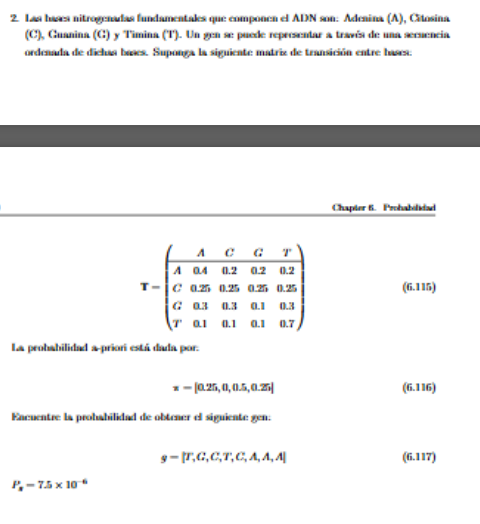

In [176]:
States = np.array([1,2,3,4])
dictS = {1:'A',2:'C',3:'G',4:'T'}
T = np.array([[0.4,0.2,0.2,0.2],[0.25,0.25,0.25,0.25],[0.3,0.3,0.1,0.3],[0.1,0.1,0.1,0.7]])
Prior = np.array([0.25,0.25,0.25,0.25])
g = [4,3,2,4,2,1,1,1]

In [177]:
a = np.zeros((len(g), 4))
q = 1 / 4.37 #sup uniforme
a[0, :] = Prior * q

for k in range(1, len(g)):
    for j in range(4):
        a[k, :] = a[k-1, :].dot(T) * q

Pg = np.sum(a[len(g)-1, :])
Pg

7.518799506345532e-06

Muestreo

Punto 9

In [178]:
def velocidadMedia(vAB,vBA):
    d = random.randint(1, 60)
    tAB = d/vAB
    tBA = d/vBA
    return (2*d/(tAB+tBA))

Velocidad = velocidadMedia(30,60)
print("La velocidad media del viaje completo es:", Velocidad, "millas por hora")


La velocidad media del viaje completo es: 40.0 millas por hora


Punto 10: Avión

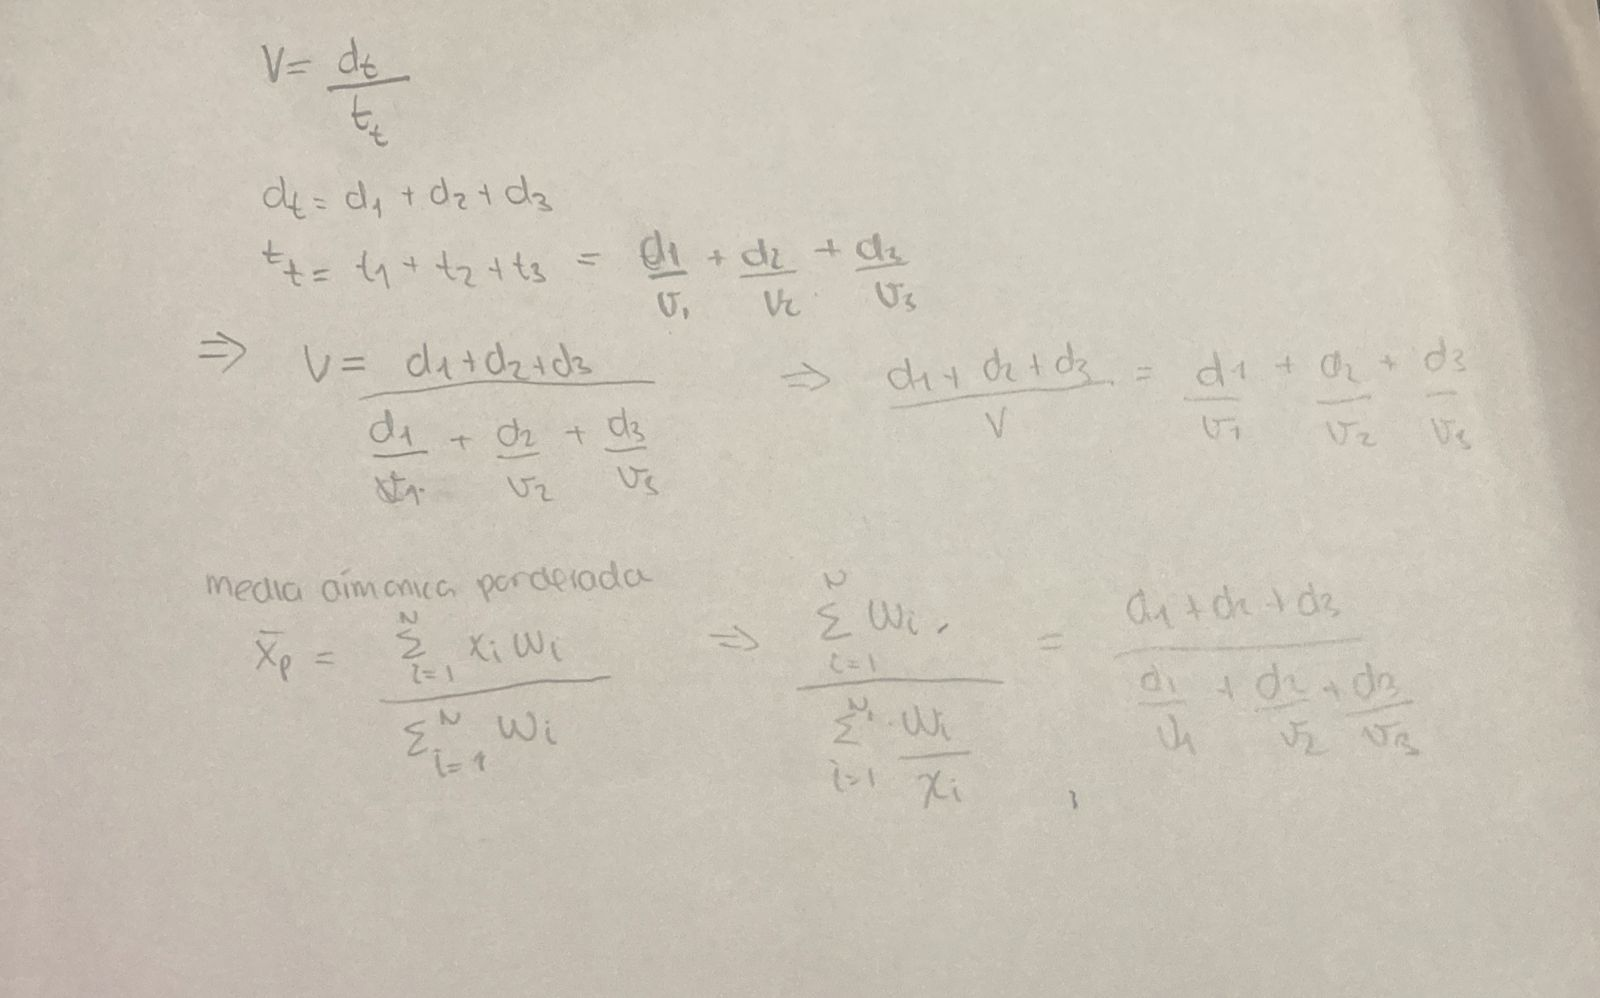

Punto 11

In [179]:
N = 10**4
X1 = gamma.rvs(a=2, scale=3, size=N)
X2 = norm.rvs(loc=5, scale=2, size=N)
X3 = uniform.rvs(loc=0, scale=10, size=N)
Xv = np.vstack((X1, X2, X3))
a = np.array([1, 2, -1])

In [180]:
X = np.dot(a, Xv)
EX = np.mean(X)
VarX = np.var(X)

print(f"Media de X (E[X]): {EX}")
print(f"Varianza de X (Var[X]): {VarX}")

Media de X (E[X]): 10.962095464483264
Varianza de X (Var[X]): 41.53753008408107


In [181]:
#Teorico
E1, E2, E3 = 2 * 3, 5, 10 / 2
EX_teorico = np.dot(a, [E1, E2, E3])

Var1, Var2, Var3 = 2 * 3**2, 2**2, (10**2) / 12
CovX = np.cov(Xv)
VarX_teorico = np.dot(a, np.dot(CovX, a))

print(f"Media teórica de X: {EX_teorico}")
print(f"Varianza teórica de X: {VarX_teorico}")

Media teórica de X: 11.0
Varianza teórica de X: 41.541684252506315


In [182]:
# Coeficientes de correlación de Pearson
corr = np.corrcoef(Xv)
print("Matriz de correlación de Pearson con Numpy: \n",corr)

Matriz de correlación de Pearson con Numpy: 
 [[1.         0.00111472 0.01401105]
 [0.00111472 1.         0.00459892]
 [0.01401105 0.00459892 1.        ]]


In [183]:
C = np.zeros((len(Xv), len(Xv)))
for i in range(len(Xv)):
    for j in range(i, len(Xv)):
        cov = np.cov(Xv[i], Xv[j])[0, 1]
        corr = cov / (np.std(Xv[i]) * np.std(Xv[j]))
        C[i, j] = corr
        C[j, i] = corr
print("Matriz de correlación:\n", C)

Matriz de correlación:
 [[1.00010001 0.00111483 0.01401245]
 [0.00111483 1.00010001 0.00459938]
 [0.01401245 0.00459938 1.00010001]]


In [184]:
#formula de la varianza media